<a href="https://colab.research.google.com/github/Redcoder815/Deep_Learning_TensorFlow/blob/main/VanishingAndExplodingGradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
np.random.seed(42)

X = np.random.randn(2000, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [3]:
def build_model(activation, layers=20):
    model = Sequential()
    model.add(tf.keras.Input(shape=(2,)))
    model.add(Dense(32, activation=activation))

    for _ in range(layers - 1):
        model.add(Dense(32, activation=activation))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy'
    )
    return model

In [4]:
sigmoid_model = build_model('sigmoid', layers=20)

sigmoid_history = sigmoid_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    verbose=0
)

In [5]:
relu_model = build_model('relu', layers=20)

relu_history = relu_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    verbose=0
)

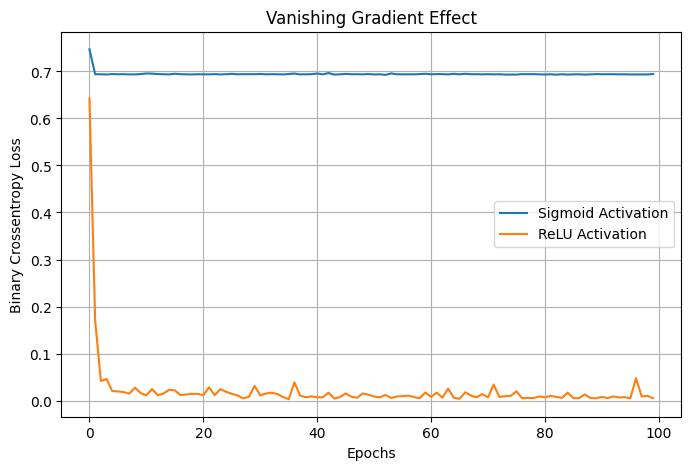

In [6]:
plt.figure(figsize=(8,5))
plt.plot(sigmoid_history.history['loss'], label='Sigmoid Activation')
plt.plot(relu_history.history['loss'], label='ReLU Activation')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.title('Vanishing Gradient Effect')
plt.legend()
plt.grid(True)
plt.show()